In [1]:
import numpy as np
import json
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.preprocessing import label_binarize
import joblib

In [2]:
labels = ['a', 'am', 'bm', 'c', 'd', 'dm', 'e', 'em', 'f', 'g', 'b', 'a#', 'a#m', 'gm', 'g#m', 'g#', 'fm', 'f#m', 'f#', 'd#m', 'd#', 'cm', 'c#m', 'c#']

In [3]:
# Path to the dataset_json folder
folder_path = "C:\\Users\\DELL\\Desktop\\Pulchowk\\Major_Project\\ChordClassification\\ChordDatasets\\dataset_json"

# Initialize lists for features and labels
X, y = [], []

# Ensure pitch and labels align
for filename in os.listdir(folder_path):
    if filename.endswith(".json"):  
        file_path = os.path.join(folder_path, filename)
        
        with open(file_path, "r") as f:
            data = json.load(f)

            if len(data['pitch']) == 1 and len(data['labels']) == 1:  
                X.append(data['pitch'][0])  # Store single pitch sample
                y.append(np.argmax(data['labels'][0]))  # Convert one-hot to class index
            else:
                print(f"Skipping {filename}: Pitch({len(data['pitch'])}) != Label({len(data['labels'])})")

X = np.array(X)
y = np.array(y)


In [4]:
# Convert lists to numpy arrays
X = np.array(X)
y = np.array(y).flatten()

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
print(f"X shape: {X.shape}, y shape: {y.shape}")

X shape: (5840, 12), y shape: (5840,)


In [6]:
# Train SVM model
svm_model = SVC(kernel='linear')  # You can change the kernel type
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [7]:
# Split data into train and test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure train_size never reaches 1.0
train_sizes = np.linspace(0.1, 0.9, 10)  # From 10% to 90% of training data
train_acc = []
test_acc = []

for size in train_sizes:
    X_train_part, _, y_train_part, _ = train_test_split(X_train, y_train, train_size=float(size), random_state=42)
    model = SVC(kernel='linear')
    model.fit(X_train_part, y_train_part)
    
    train_acc.append(model.score(X_train_part, y_train_part))
    test_acc.append(model.score(X_test, y_test))


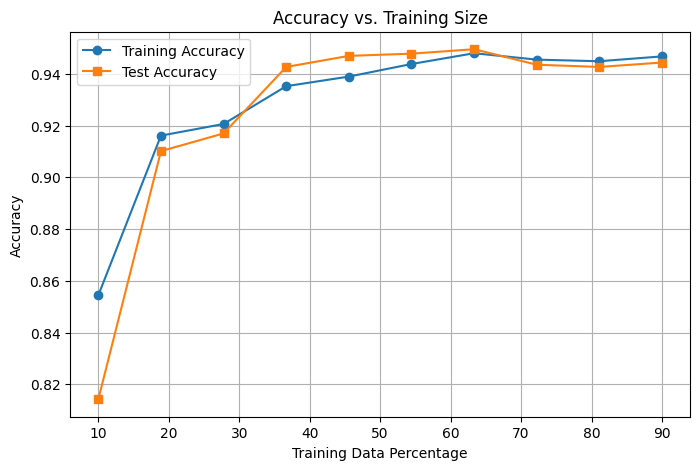

In [8]:
# Plot Accuracy Curve
plt.figure(figsize=(8, 5))
plt.plot(train_sizes * 100, train_acc, label="Training Accuracy", marker='o')
plt.plot(train_sizes * 100, test_acc, label="Test Accuracy", marker='s')
plt.xlabel("Training Data Percentage")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Training Size")
plt.legend()
plt.grid()
plt.show()


In [9]:
# # Predictions
# X = np.array([   0.03792062012880676,
#             0.015966651567461076,
#             0.1755060054885586,
#             0.01526822807422723,
#             0.032959425243670876,
#             0.12878191790645782,
#             0.048213307931845806,
#             0.028896274952099472,
#             0.05481133417693039,
#             0.04142177829451716,
#             0.37695642720502703,
#             0.043298029030397804
#         ])
# X = np.array([
#             0.10129311894852623,
#             0.17803168451900733,
#             0.0056310268333235715,
#             0.07154727816824247,
#             0.007591019954983845,
#             0.2223934434832557,
#             0.014100965029358419,
#             0.010606169371024057,
#             0.3392860206738445,
#             0.031042839791251314,
#             0.009210567539808378,
#             0.00926586568737422
#         ]
# )

# # y_pred = svm_model.predict(X.reshape(1,-1))
# print(type(y_pred.astype(np.int32)))
# print(type(y_pred))
# print(y_pred.shape)
# print(type(y_pred.item()))


y_pred = svm_model.predict(X_test)
# y_pred = svm_model.predict(np.array([
#             0.03792062012880676,
#             0.015966651567461076,
#             0.1755060054885586,
#             0.01526822807422723,
#             0.032959425243670876,
#             0.12878191790645782,
#             0.048213307931845806,
#             0.028896274952099472,
#             0.05481133417693039,
#             0.04142177829451716,
#             0.37695642720502703,
#             0.043298029030397804
#         ]))

# # Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 94.52%


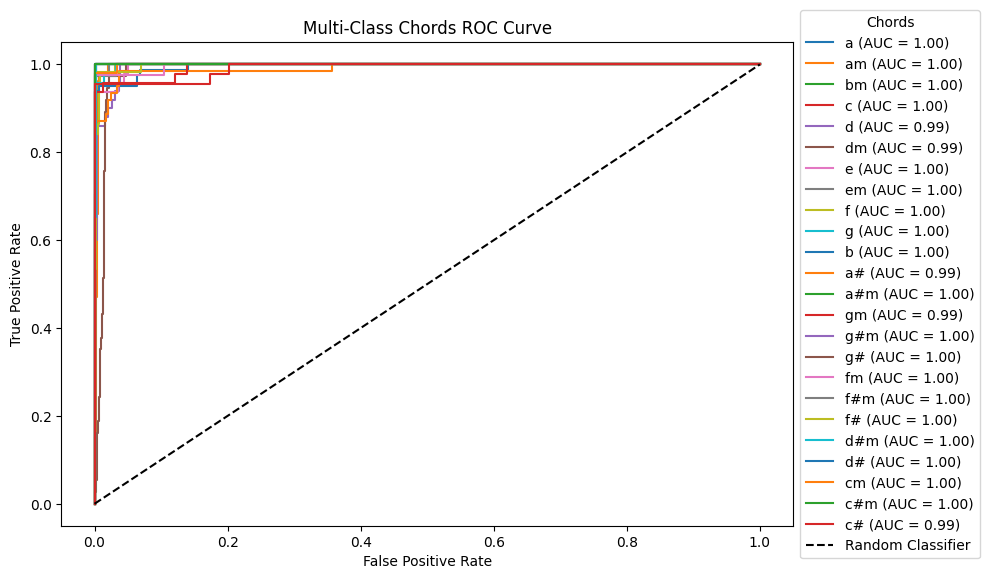

In [10]:
# Convert labels to One-vs-Rest format
y_test_bin = label_binarize(y_test, classes=np.arange(len(labels)))
y_pred_scores = svm_model.decision_function(X_test)

plt.figure(figsize=(10, 6))
for i in range(len(labels)):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_scores[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{labels[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class Chords ROC Curve')
# Move legend outside the plot (Right Side)
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5), title="Chords")
plt.tight_layout()
plt.show()

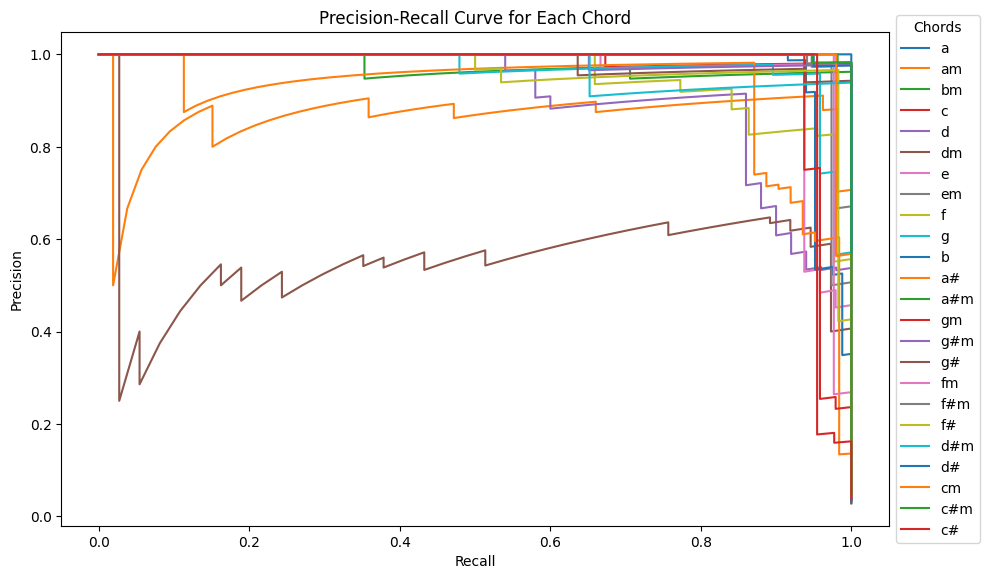

In [11]:
plt.figure(figsize=(10, 6))
for i in range(len(labels)):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_pred_scores[:, i])
    plt.plot(recall, precision, label=f'{labels[i]}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Each Chord')
# Move legend outside the plot (Right Side)
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5), title="Chords")
plt.tight_layout()
plt.show()


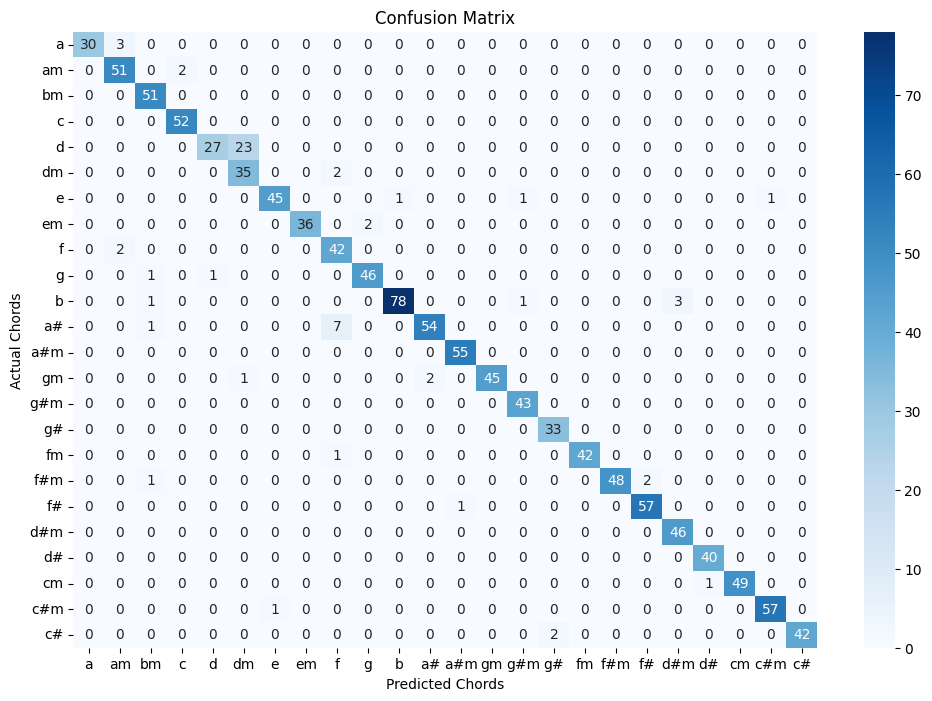

In [12]:
# Create confusion matrix
labels = ['a', 'am', 'bm', 'c', 'd', 'dm', 'e', 'em', 'f', 'g', 'b', 'a#', 'a#m', 'gm', 'g#m', 'g#', 'fm', 'f#m', 'f#', 'd#m', 'd#', 'cm', 'c#m', 'c#']
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Chords')
plt.ylabel('Actual Chords')
plt.title('Confusion Matrix')
plt.show()

In [13]:
from sklearn.metrics import precision_recall_fscore_support

# # Replace this with your actual predictions and ground truth
# y_test = [...]  # List of true labels (ground truth)
# y_pred = [...]  # List of predicted labels

# Define your chord labels
labels = ['a', 'am', 'bm', 'c', 'd', 'dm', 'e', 'em', 'f', 'g', 'b', 
          'a#', 'a#m', 'gm', 'g#m', 'g#', 'fm', 'f#m', 'f#', 
          'd#m', 'd#', 'cm', 'c#m', 'c#']

# Compute Precision, Recall, and F1-score with zero_division fix
precision, recall, f1, _ = precision_recall_fscore_support(
    y_test, y_pred, labels=labels, average=None, zero_division=1
)

# Print formatted table values
print("Chord\tPrecision (%)\tRecall (%)\tF1-Score (%)")
for label, p, r, f in zip(labels, precision, recall, f1):
    print(f"{label}\t{p*100:.1f}\t\t{r*100:.1f}\t\t{f*100:.1f}")


Chord	Precision (%)	Recall (%)	F1-Score (%)
a	100.0		100.0		100.0
am	100.0		100.0		100.0
bm	100.0		100.0		100.0
c	100.0		100.0		100.0
d	100.0		100.0		100.0
dm	100.0		100.0		100.0
e	100.0		100.0		100.0
em	100.0		100.0		100.0
f	100.0		100.0		100.0
g	100.0		100.0		100.0
b	100.0		100.0		100.0
a#	100.0		100.0		100.0
a#m	100.0		100.0		100.0
gm	100.0		100.0		100.0
g#m	100.0		100.0		100.0
g#	100.0		100.0		100.0
fm	100.0		100.0		100.0
f#m	100.0		100.0		100.0
f#	100.0		100.0		100.0
d#m	100.0		100.0		100.0
d#	100.0		100.0		100.0
cm	100.0		100.0		100.0
c#m	100.0		100.0		100.0
c#	100.0		100.0		100.0


In [ ]:
from sklearn.metrics import classification_report

# Assuming 'y_test' are the true labels and 'y_pred' are the predicted labels
labels = ['a', 'am', 'bm', 'c', 'd', 'dm', 'e', 'em', 'f', 'g', 'b', 
          'a#', 'a#m', 'gm', 'g#m', 'g#', 'fm', 'f#m', 'f#', 'd#m', 
          'd#', 'cm', 'c#m', 'c#']

print(classification_report(y_test, y_pred, target_names=labels))

              precision    recall  f1-score   support

           a       1.00      0.91      0.95        33
          am       0.91      0.96      0.94        53
          bm       0.93      1.00      0.96        51
           c       0.96      1.00      0.98        52
           d       0.96      0.54      0.69        50
          dm       0.59      0.95      0.73        37
           e       0.98      0.94      0.96        48
          em       1.00      0.95      0.97        38
           f       0.81      0.95      0.88        44
           g       0.96      0.96      0.96        48
           b       0.99      0.94      0.96        83
          a#       0.96      0.87      0.92        62
         a#m       0.98      1.00      0.99        55
          gm       1.00      0.94      0.97        48
         g#m       0.96      1.00      0.98        43
          g#       0.94      1.00      0.97        33
          fm       1.00      0.98      0.99        43
         f#m       1.00    

In [14]:
# import pickle
# X = np.array([
#             0.10129311894852623,
#             0.17803168451900733,
#             0.0056310268333235715,
#             0.07154727816824247,
#             0.007591019954983845,
#             0.2223934434832557,
#             0.014100965029358419,
#             0.010606169371024057,
#             0.3392860206738445,
#             0.031042839791251314,
#             0.009210567539808378,
#             0.00926586568737422
#         ]
# )


# # Save the trained model to a .pkl file
# with open('nn_model_24.pkl', 'wb') as f:
#     pickle.dump(model, f)


# with open('nn_model_24.pkl', 'rb') as f:
#     loaded_model = pickle.load(f)

#     out = loaded_model.predict(X.reshape(1,-1 ))
#     print(out)
    
    